# Проект - исследование рынка российского кинопроката

Заказчик этого исследования — Министерство культуры Российской Федерации. 

Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. 

Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**1. Открываем файлы с данными и объедтняем их в один датафрейм.**

**Открываем файлы с данными и смотрим информацию по данным датафреймов, используя методом info().** 

In [3]:
mkrf_movies = pd.read_csv('D:\Мои Документы\Desktop\Материалы по учебе\Сборный проект 1\mkrf_movies.csv')
#mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
mkrf_shows = pd.read_csv('D:\Мои Документы\Desktop\Материалы по учебе\Сборный проект 1\mkrf_shows.csv')
#mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
mkrf_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


**Меняем тип данных в колонке puNumber в датафрейме mkrf_shows методом astype(), проверяем тип данных в данном столбце. При попытке поменять тип данных в столбце, вышла ошибка, что в столбце puNumber есть значение 'нет'. Пока решила найти данные строки и поменять в них значение 'нет' на 0, а потом при обработке данных уже решу, что с этим делать.**

In [4]:
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет', 'puNumber'] = 0
mkrf_movies.query('puNumber == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),0,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int64')
mkrf_movies.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

**Объеденям датафрейм mkrf_movies и mkrf_shows в один методом merge(), по принципу, чтобы все значения в mkrf_movies вошли в новый датасет.**

In [6]:
df = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Открыла два файла с данными mkrf_movies и mkrf_shows, поменяла тип данных столбца puNumber в датафрейме mkrf_movies на int, объеденила их в один датафрейм - df.

**2.Предобработка данных**

**Изменяем тип данных в столбце 'show_start_date'на datetime методом to_datetime()**

In [7]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Изменяем тип данных в столбце 'ratings' на float. Смотрим , какие уникальные занения есть в этом столбце.**

In [8]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

**В ряде случаев рейтинг указан в %, изменяем эти значения на корректные методом replace(), проверяем уникальные значения.**

In [9]:
dictionary = {'99%': '9.9', '28%': '2.8', '97%': '9.7', '83%': '8.3', '64%': '6.4', '91%': '9.1', '94%': '9.4', 
              '62%': '6.2', '79%': '7.9', '90%': '9.0', '19%': '1.9', '88%': '8.8', '89%': '8.9',  '98%': '9.8'} 

df['ratings'] = df['ratings'].replace(dictionary, regex=True )
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '9.9', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '2.8', '3.7', '1.4', '3.1',
       '9.7', '3.5', '3.2', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1',
       '3.6', '9.1', '9.4', '9.0', '1.9', '1.0', '8.9', '1.3', '1.8',
       '1.2', '1.7', '9.8'], dtype=object)

**Переводим значение данных в столбце в формат float методом to_numeric, т.к  остались занчения nan**

In [10]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
display(df.info())
df['ratings'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

None

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

**Определяем количество пропусков в датафрейме**

In [11]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

**Исследуем пропуски в столбце film_studio**

In [12]:
df.query('film_studio.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Вывод** - Возмоно пропуски связаны с тем, что данная информация не обязательна для заполнения, или это фильмф снятые самостоятельно. Заполняю пропуски значением - Неизвестная студия. Проверяем количество пропусков.

In [13]:
df.loc[df['film_studio'].isna(), 'film_studio'] = 'Неизвестная студия'
df['film_studio'].isna().sum()

0

**Исследуем пропуски в столбце production_country**

In [14]:
df.query('production_country.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Неизвестная студия,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


**Вывод** - Данные фильмы произведены в России, поэтому заменяем пропуски на Россию

In [15]:
df.loc[df['production_country'].isna(), 'production_country'] = 'Россия'
df['production_country'].isna().sum()

0

**Исследуем пропуски в столбце director**

In [16]:
df.query('director.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Неизвестная студия,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


**Вывод** - Скорее всего у данных фильмов отсутсвует режесер, т.к. его нет, в основном это концерты. Поэтому оставляю пропуски.

**Исследуем пропуски в столбце producer**

In [17]:
display(df.query('producer.isna()').head())
df.query('producer.isna()')['production_country'].unique()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN


array(['СССР', 'СССР, Венгрия', 'Чехословакия', 'США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия',
       'Франция - Италия - Великобритания - США', 'Чехия',
       'СССР, Финляндия', 'Великобритания - США', 'Япония',
       'СССР, Польша', 'СССР - Швейцария - Франция', 'Франция',
       'Великобритания', 'Австралия', 'Италия', 'Украина',
       'Франция-Бельгия', 'Мексика - Франция',
       'Великобритания - Германия', 'Россия', 'Иран',
       'Республика Узбекистан', 'Бразилия', 'Италия ', 'Франция - Россия',
       'Индонезия', 'СССР, ФРГ, Западный Берлин',
       'США - Канада - Афганистан - Бельгия - Франция',
       'США - Великобритания - Германия - Новая Зеландия - Бельгия - Франция',
       'Бельгия - Испания - Канада - Нидерланды',
       'СССР, Венгрия, ЧССР, ГДР', 'СССР  ', 'СССР ', ' СССР ', 'СССР   ',
       ' СССР   ', 'СССР     ', 'Индия - Мексика', 'СССР    ', ' С

**Вывод** - Скорее всего пропуски в этом столбце обусловлены отсутсвием информации. Например, в СССР не было продюссеров у фильмов. Оставляем пропуски.

**Вывод** - Наличие пропусков в столбцах 'refundable_support'  'nonrefundable_support' 'budget financing_source' 'budget' обусловлено тем, что в этих колонках есть информация только по тем фильмам, у которых была поддержка со стороны государства. Пропуски в столбце 'box_office' обусловлены отсутсвием информации  о номере прокатного удостьоверения и сборах в файле - mkrf_shows, поэтому при слиянии датафреймов появились пропуски.


**Исследуем пропуски в столбце genres**

In [18]:
display(df.query('genres.isna()').tail(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7457,Шарнохой - жёлтый пёс,111021819,2019-12-12 12:00:00+00:00,Художественный,"ООО Студия ""БурятКино""",Россия,Б.Дышенов,Б.Дышенов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,129500.00
7459,Эрмитаж. Сила искусства,126007819,2019-12-11 12:00:00+00:00,Прочие,"3D Продуциони, Нексо Диджитал",Италия,Микеле Малли,"Диди Ньокки, Франко Ди Сарро",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,1032821.51
7462,МУЛЬТ в кино. Выпуск № 109,114004919,2019-12-21 12:00:00+00:00,Анимационный,"ООО ""Мульт в кино""",Россия,П.Смирнов,П.Смирнов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7467,Жёлтый клевер,111022219,2019-12-27 12:00:00+00:00,Художественный,Соломатина Людмила Леонидовна,Россия,Л.Соломатина (Томилова),Л.Соломатина (Томилова),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7470,Дикие и свободные,112004819,2019-12-23 12:00:00+00:00,Документальный,"АНО ""ТВ-Новости""",Россия,Н.Карачкова,В.Сенина,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.00
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Исследуем пропуски в столбце ratings**

In [19]:
display(df.query('ratings.isna()').tail(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7457,Шарнохой - жёлтый пёс,111021819,2019-12-12 12:00:00+00:00,Художественный,"ООО Студия ""БурятКино""",Россия,Б.Дышенов,Б.Дышенов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,129500.00
7459,Эрмитаж. Сила искусства,126007819,2019-12-11 12:00:00+00:00,Прочие,"3D Продуциони, Нексо Диджитал",Италия,Микеле Малли,"Диди Ньокки, Франко Ди Сарро",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,1032821.51
7462,МУЛЬТ в кино. Выпуск № 109,114004919,2019-12-21 12:00:00+00:00,Анимационный,"ООО ""Мульт в кино""",Россия,П.Смирнов,П.Смирнов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7467,Жёлтый клевер,111022219,2019-12-27 12:00:00+00:00,Художественный,Соломатина Людмила Леонидовна,Россия,Л.Соломатина (Томилова),Л.Соломатина (Томилова),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7470,Дикие и свободные,112004819,2019-12-23 12:00:00+00:00,Документальный,"АНО ""ТВ-Новости""",Россия,Н.Карачкова,В.Сенина,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.00
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Вывод** - Скорее всего данные о рейтинге и жанре подтягивались в файл из другого источника данных (скорре всего из Кинопоиска), либо произошел технический сбой и данные не подтянулись или этих данных изначачльно не было в данном источнике. Оставляем пропуски.

**Проверяем есть ли в датафрейме явные дубликаты. Явных дубликатов нет. **

In [20]:
df.duplicated().sum()

0

**Проверяем наличие явных и неявных дубликатов и исследуем данные в столбцах title и puNumber**

In [21]:
print(df['title'].value_counts())
df['title'].duplicated().sum()

День святого Валентина_                                        5
Непокоренный.                                                  4
Не брать живым /По книге Раджива Чандрасекарана/               4
Красавчик-2                                                    4
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/    4
                                                              ..
Клара и волшебный дракон                                       1
Охота жить                                                     1
Судная ночь. Начало                                            1
Пришествие дьявола                                             1
Мой любимый динозавр                                           1
Name: title, Length: 6772, dtype: int64


714

In [22]:
df.query('title == "День святого Валентина_"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


In [23]:
print(df['puNumber'].duplicated().sum())
duplicated_puNamber = df[df['puNumber'].duplicated()]
duplicated_puNamber

2


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [24]:
df.query('puNumber == 221154310 or puNumber == 221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


**Вывод** - Проанализировала два столбца название фильма и номер прокатного удостоверения. Дубликатов в столбце title много, но при этом номера прокатных удостоверений повторяются толькол 2 раза. Следовательно наличие дублей в названии фильмов обусловлено разными датами премьеры фильма. Дубликатов в столбце puNumber всего 2: 221154310 - тут какая-то ошибка при вводе данных, т.к. два разных фильма с одним номером прокатного удостоверения (оставляю оба, т.к. не понятно, где неправильный);  221054410 - тут речь идет об одном и том же названии фильма, но видимо разные версии фильма (оставляю оба).

**Проверяю наличие неявных дубликатов в столбце type.**

In [25]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

**Удаляем неявные дубликаты в столбце type и проверяем**

In [26]:
dictionary2 = {' Художественный':'Художественный', ' Анимационный': 'Анимационный'} 

df['type'] = df['type'].replace(dictionary2, regex=True )
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

**Проверяю наличие явных и неявных дубликатов и исследуем данные в столбце film_studio**

In [27]:
print(df['film_studio'].duplicated().sum())
df['film_studio'].unique()

1995


array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

**Вывод** - Дубликаты есть, они обоснованы тем, что одни и те же киностудии производят разные фильмы + один и тот же фильм появляется ни раз с разными номерами прокатных удостоверений. Проверить неявные дубликаты крайне сложно, т.к. занчений много, но скорее всего есть, т.к. одни и те же названия могут быть по разному записаны, может быть разное количество пропусков и отступов.

**Проваеряем наличие неявных дубликатов в столбце production_country и исследуем данные в нем**

In [28]:
print(len(df['production_country'].unique()))
df['production_country'].unique()

950


array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [29]:
dictionary3 = {'СССР    ': 'СССР', ' СССР': 'СССР', 'СССР  ': 'СССР', 'СССР ': 'СССР', ' СССР ': 'СССР',
             ' СССР   ': 'СССР', 'СССР     ': 'СССР','СССР    ': 'СССР', 'Сша': 'США'}

df['production_country'] = df['production_country'].replace(dictionary3, regex=True)
print(len(df['production_country'].unique()))
df['production_country'].unique()

941


array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

**Вывод** - Много неявных дуюликотов, вызванных тем, что данные заносятся с пробелами, отступами, есть разница при написании за счет использования строчных и прописных букв, если несколько стран, то используются роазные разделители. Исправила те неявные дубликаты, которые смогла увидеть. 

**Проваеряем наличие неявных дубликатов в столбце director и исследуем данные в нем.**

In [30]:
display(df['director'].value_counts())
display(df.loc[50:70,'director'])
len(df['director'].unique())

О.Семёнова                               47
Д.Червяцов                               17
Стивен Содерберг                         17
Ридли Скотт                              16
Тиль Швайгер                             14
                                         ..
Бен Блейн, Крис Блейн                     1
Тим Фельбаум                              1
Ксави Хименез                             1
Айрон Блейз, Роберт Уокер                 1
Д.Цибаускайте (псевдоним - Дали Руст)     1
Name: director, Length: 4811, dtype: int64

50                        С.Соловьев
51    Иоахим Реннинг, Эспен Сандберг
52                       Ролан Быков
53                     Семен Туманов
54                       Питер Сигал
55                            М.Ромм
56                          Г.Полока
57                         Ю.Райзман
58        Дрю Дэйуолт, Дэвид Шнейдер
59                        С.Самсонов
60         Айрон Блейз, Роберт Уокер
61                      К.Шахназаров
62                          И.Гостев
63                         Е.Матвеев
64                       Т.Лукашевич
65                        В.Павлович
66                      Эмиль Лотяну
67                      Тиль Швайгер
68                          А.Птушко
69                        Г.Натансон
70                          В.Азаров
Name: director, dtype: object

4812

**Вывод** - Неявные дубликаты есть, но выявить их в таком количестве данных сложно, нашла один из таких дубликатов ранее (ХЭрольд Рэмис, Гарольд Реймис), но не уверена, что нет еще другого написания. Свзяано возникновение неявных дубликатов с тем, что ФИО режесеров пишут по разному. В ряде случаев это связано с переводом с одного языка на  другой, где-то указано имя и фамилия полностью, где-то инициалы и фамилия, может быть разное количество пропусков между словами и т.п.

**Исследуем уникальные занчения и данные в столбце age_restriction**

In [31]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Для дальнейшего удобства работы с данным столбцом изменю названия категорий

In [32]:
dictionary4 = {'«18+» - запрещено для детей': '18+', '«6+» - для детей старше 6 лет': '6+',
               '«12+» - для детей старше 12 лет': '12+', '«16+» - для детей старше 16 лет': '16+', 
               '«0+» - для любой зрительской аудитории': '0+'}

df['age_restriction'] = df['age_restriction'].replace(dictionary4)
df['age_restriction'].unique()

array(['18+', '6+', '12+', '16+', '0+'], dtype=object)

**Вывод** Проанализировав инфоромацию, содержащуюся в столбцах с категориальными значениями, можно выделить общую проблему - данные занесены по разномму (нет стандарта занечения информации), используются разные разделители, разное количество пробелов, разное количенство отступов, разный формат записи ФИО, наблюдаются разное написание слов при переводе их на русский.

**Изучаем столбцы с количественными занчениями методом describe() и строим гистограммы для всех столбцов**

In [33]:
df[['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office']].describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,3.320000e+02,3.320000e+02,3.320000e+02,6519.000000,3.158000e+03
mean,1.186446e+07,4.898099e+07,1.272297e+08,6.488173,7.647870e+07
std,2.491656e+07,5.998012e+07,1.885883e+08,1.114638,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09


array([[<AxesSubplot:title={'center':'refundable_support'}>,
        <AxesSubplot:title={'center':'nonrefundable_support'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'ratings'}>],
       [<AxesSubplot:title={'center':'box_office'}>, <AxesSubplot:>]],
      dtype=object)

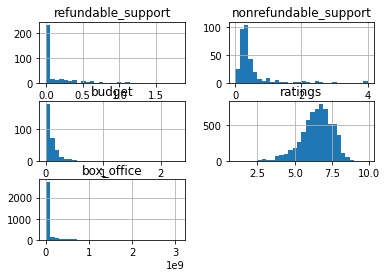

In [34]:
df[['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office']].hist(bins=30)

**Вывод** - Распределение значений в столбце 'ratings' выглядит вполне логичным, близким к нормальному, поэтому в этом столбце все оставляю как есть. Данные в дргих столбцах надо рассмотреть более подробно.

Так как в задании указано, что столбец budget включает в себя полный объем государственной поддержки, то проверояем нет ли такой ситуации, что refundable_support + nonrefundable_support больше budget'. Если такие данные сеть, то они некорректны и лучше их удалить.

In [35]:
df.query('(refundable_support + nonrefundable_support) > budget')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16+,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12+,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16+,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,6+,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18+,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12+,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12+,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


In [36]:
df.query('budget == 0.0')['budget'].count()

17

In [37]:
df.query('not (budget.isna())').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16+,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12+,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,28140.0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12+,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16+,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16+,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0
1854,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,6+,0.0,25000000.0,51850000.0,Министерство культуры,6.1,"мультфильм,фэнтези,история",15078858.6
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,12+,50000000.0,100000000.0,220588394.0,Фонд кино,8.5,"драма,военный,история",249166767.7
1871,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,12+,0.0,46502299.0,86210067.0,"Министерство культуры, Фонд кино",6.7,драма,4731239.5
1903,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,6+,0.0,75000000.0,139551503.0,Фонд кино,7.0,"триллер,боевик,приключения",352804320.4
1912,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,16+,0.0,34000000.0,48571430.0,Министерство культуры,7.4,"фэнтези,приключения,драма",51907.5


**Выявили, что в колонке budget у 17 фильмов неверно указан бюджет, исправлем данные, скороее всего просто указали, что собственный бюджет равен 0. Проверяем.**

In [38]:
df.loc[df['budget'] == 0.0, 'budget'] = df['refundable_support'] + df['nonrefundable_support']
df.query('budget == 0.0')['budget'].count()

0

In [39]:
df.query('puNumber == 111023614')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16+,0.0,23000000.0,23000000.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.1


**Исправив данные по бюджету, смотрим как изменились данные в этом столбце (получаем инфоромацию по столбцу методом describe() и строим гистограмму**

count    3.320000e+02
mean     1.314224e+08
std      1.871482e+08
min      6.000000e+06
25%      4.552480e+07
50%      7.119690e+07
75%      1.500000e+08
max      2.305074e+09
Name: budget, dtype: float64

<AxesSubplot:title={'center':'Бюджет'}, ylabel='Frequency'>

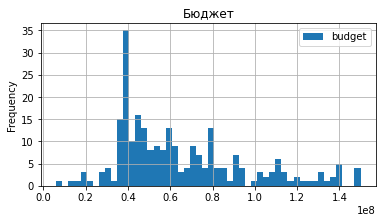

In [40]:
display(df['budget'].describe())
df.plot(kind='hist', y='budget', bins=50, title = 'Бюджет', figsize = (6,3), grid=True, range=(6.000000e+06, 1.500000e+08))

In [41]:
df.query('budget < 10000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12+,0.0,6000000.0,6000000.0,Министерство культуры,4.3,комедия,15362931.43


**Вывод** - Теперь распределние выглядит более логичным.  Минимальный бюджет теперь составляет 6000000 руб, медиана около - 70000000 руб, среднее значение около 130000000. Nакое отличие медианы от среднего значения обусловлено длинным хвостом с правой стороны (наличием фильмов с большим бюджетом вплоть до 2300000000 руб). 

**Исследуем данные в столбце - 'refundable_support'**

<AxesSubplot:title={'center':'Объем возвратных средств государственной поддержки'}, ylabel='Frequency'>

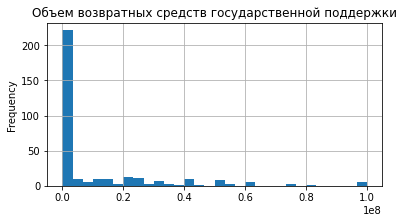

In [42]:
df['refundable_support'].plot(kind='hist', bins=30, title ='Объем возвратных средств государственной поддержки', 
                              figsize = (6,3), grid=True, range=(0, 1.000000e+08))


**Вывод** - Пик значений приходится на сумму равную 0 руб (в большинстве случаев объем возвратных средств государственной поддержки = 0), что в принципе может соответсвовать действительности. Большой хвост в правой стороне, обусловлен наличием фильмов, у которых объем возвратных средств государственной поддержки достаточно большой. Пока оставляю все значения, т.к. анамалий здесь не вижу.

**Исследуем данные в столбце - 'nonrefundable_support'**

<AxesSubplot:title={'center':'Объем невозвратных средств государственной поддержки'}, ylabel='Frequency'>

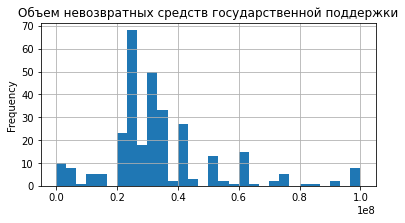

In [43]:
df['nonrefundable_support'].plot(kind='hist', bins=30, title ='Объем невозвратных средств государственной поддержки', 
                              figsize = (6,3), grid=True, range=(0, 100000000))

**Вывод** - Тут картина немного другая, но тоже не вижу анамальных данных. Случаев с нулевым объемом невозвратных стредств мало. Средненее значение в районе - 49000000. Медиана - 30000000. Разница также обусловлена наличием длинного хвоста справа (данные по медиане и среднему брала из описания количенственных столбцов выше). Пока оставляю все значения, т.к. анамалий здесь не вижу.

**На всякимй случай проверяем, нет ли такой ситуации, что и сумма невозвратных и возвратных средств равно 0. Таких ситуаци нет.**

In [44]:
df.query('nonrefundable_support == 0 and refundable_support==0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**Исследуем данные в столбце - 'box_office'. Минимальное значение в столбце = 0, что выглядит очень странно (данныне получены выше), исследуем данные строки и какой процент от общего читсла они занимают.**

In [45]:
display(df.query('box_office == 0'))
len(df.query('box_office == 0'))/len(df)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,NaN,6+,NaN,NaN,NaN,NaN,7.7,"драма,биография,музыка",0.0
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,NaN,12+,NaN,NaN,NaN,NaN,8.2,драма,0.0
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",16+,NaN,NaN,NaN,NaN,6.3,комедия,0.0
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,12+,NaN,NaN,NaN,NaN,6.5,"драма,военный,история",0.0
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",12+,NaN,NaN,NaN,NaN,7.4,"аниме,мультфильм,драма",0.0
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",12+,NaN,NaN,NaN,NaN,7.7,"аниме,мультфильм,фантастика",0.0
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,12+,NaN,NaN,NaN,NaN,7.9,биография,0.0
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,16+,NaN,NaN,NaN,NaN,5.5,"комедия,мелодрама",0.0
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",12+,NaN,NaN,NaN,NaN,5.8,"мелодрама,комедия,драма",0.0
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...",Германия - Бельгия - США -Франция,Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",16+,NaN,NaN,NaN,NaN,6.9,драма,0.0


0.0032059845044082286

**Скорее всего это некорректные данные, удаляем данные строки и проверяем**

In [46]:
df = df.loc[df['box_office'] != 0]
len(df.query('box_office == 0'))

0

**Исправив данные по бюджету, смотрим как изменились данные в этом столбце (получаем инфоромацию по столбцу методом describe() и строим гистограмму**

count    3.134000e+03
mean     7.706437e+07
std      2.411784e+08
min      4.000000e+01
25%      1.010288e+05
50%      2.409099e+06
75%      2.456979e+07
max      3.073569e+09
Name: box_office, dtype: float64

<AxesSubplot:title={'center':'Сборы'}, ylabel='Frequency'>

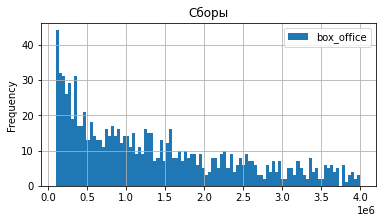

In [47]:
display(df['box_office'].describe())
df.plot(kind='hist', y='box_office', bins=100, title = 'Сборы', figsize = (6,3), grid=True, range=(100000, 4000000))
#df.plot(kind='box', y='box_office', title = 'Сборы', figsize = (6,3), grid=True)

**Посмотрим фильмы сборы, которых составили меньше 100000 руб.**

In [48]:
display(df.query('box_office < 100000 and budget.isna()'))
df.query('box_office < 100000 and not(budget.isna())')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,12+,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,6+,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия",360.0
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,6+,NaN,NaN,NaN,NaN,7.7,драма,420.0
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,6+,NaN,NaN,NaN,NaN,8.7,"комедия,мелодрама,криминал",380.0
38,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,6+,NaN,NaN,NaN,NaN,8.1,драма,1165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7154,Созданный в Бездне - Блуждающие сумерки,124006219,2019-08-15 12:00:00+00:00,Анимационный,Кинема Цитрус Ко.,Япония,Масаюки Кодзима,Мунэки Огасавара,18+,NaN,NaN,NaN,NaN,8.0,"аниме,мультфильм,детектив",73700.0
7155,Созданный в Бездне - Рассвет путешествия,124006319,2019-08-15 12:00:00+00:00,Анимационный,Кинема Цитрус Ко.,Япония,Масаюки Кодзима,Мунэки Огасавара,16+,NaN,NaN,NaN,NaN,7.9,"аниме,мультфильм,детектив",75300.0
7205,Диего Марадона,126003519,2019-09-14 12:00:00+00:00,Прочие,"Филм Фо, Лортон Интертейнмент, Корнер Филмз",Великобритания,Азиф Кападиа,"Джеймс Гэй-Рис, Пол Мартин",16+,NaN,NaN,NaN,NaN,7.7,"документальный,спорт,биография",38330.0
7421,Балет сегодня,126007219,2019-12-01 12:00:00+00:00,Прочие,"Догвуф Фильм Дистрибьюшн, Лексикат Артистс, Ст...",США,Стивен Кантор,"П.Дж.Аллен, А.Блаватник, О.Блаватник, Д.Гарги,...",16+,NaN,NaN,NaN,NaN,NaN,NaN,59829.0


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12+,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,28140.0
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16+,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5
1912,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,16+,0.0,34000000.0,48571430.0,Министерство культуры,7.4,"фэнтези,приключения,драма",51907.5
2150,РЕВЕРБЕРАЦИЯ,111003515,2015-03-30 12:00:00+00:00,Художественный,"ООО ""Артлайт""",Россия,К.Сухарьков,А.Новиков,18+,0.0,25000000.0,37371262.0,Министерство культуры,NaN,NaN,19820.0
2169,Трагедия в бухте Роджерс,111003215,2015-03-26 12:00:00+00:00,Художественный,"ООО ""Валдай""",Россия,Ф.Абрютин,"С.Кучмаева, С.Зернов",12+,0.0,30000000.0,43000000.0,Министерство культуры,6.1,"детектив,история,драма",40050.0
2379,Экспириенс,111000315,2015-01-13 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,Е.Татаров,А.Тютрюмов,16+,0.0,26000000.0,37142857.0,Министерство культуры,4.7,драма,36550.0
2397,Небесный верблюд,111000115,2015-01-14 12:00:00+00:00,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,0+,0.0,34000000.0,49280496.0,Министерство культуры,6.7,"детский,семейный",61040.0
2489,Последний вагон. Весна,111004115,2015-04-15 12:00:00+00:00,Художественный,"ООО ""ТАН Фильм""",Россия,А.Калинкин,"Д.Ефремов, В.Пономаренко",18+,0.0,25000000.0,35760060.0,Министерство культуры,5.1,триллер,61193.0
2527,Вдвоем на льдине.,111011015,2015-06-25 12:00:00+00:00,Художественный,"ООО ""Первое творческое объединение""",Россия,"Н.Джорджадзе, В.Игнатьев","П.Поляков, И.Букреев",12+,0.0,26500000.0,37943652.0,Министерство культуры,6.6,мелодрама,4450.0
2803,Битва с экстрасенсами,111011315,2015-07-20 12:00:00+00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""КИНОБАЙТ""",Россия,И.Кордзаия,Е.Мелентьев,12+,0.0,25900000.0,59560746.0,"Министерство культуры, Фонд кино",5.4,"фэнтези,приключения",6000.0


Посмотрим фильмы, сборы которых составили более 1000000000 руб.

In [49]:
df.query('box_office > 1000000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1982,Седьмой сын,121026614,2014-11-11 12:00:00+00:00,Художественный,"Леджендари Пикчерз, Мовинг Пикчерз Компани, Ут...",США - Великобритания - Канада - КНР,Сергей Бодров,"Бэзил Иваник, Томас Тулл, Лайонел Уигрэм",12+,NaN,NaN,NaN,NaN,5.8,"фэнтези,приключения",1.016411e+09
2105,Форсаж 7,121001215,2015-01-27 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Релятивити Медиа, Дентсу, Ф...",США,Джеймс Ван,"Вин Дизель, Майкл Фоттрел",16+,NaN,NaN,NaN,NaN,7.0,"боевик,триллер,приключения",1.486131e+09
2159,Мстители: Эра Альтрона,121007215,2015-04-03 12:00:00+00:00,Художественный,Марвел Студиос,США,Джосс Уидон,Кевин Фейги,12+,NaN,NaN,NaN,NaN,7.2,"фантастика,боевик,приключения",1.500989e+09
2509,Терминатор: Генезис,121012415,2015-06-11 12:00:00+00:00,Художественный,"Парамаунт Пикчерз, Скайдэнс Продакшнз",США,Алан Тэйлор,"Дэвид Эллисон, Дэна Голдберг",12+,NaN,NaN,NaN,NaN,6.4,"фантастика,боевик,триллер",1.060054e+09
2511,Монстры на каникулах 2,124003615,2015-10-15 12:00:00+00:00,Анимационный,"Коламбиа Пикчерз, ЭлСтар Кэпитал, Сони Пикчерз...",США,Геннадий Тартаковский,"Аллен Коверт, Мишель Мердокка",6+,NaN,NaN,NaN,NaN,7.2,"мультфильм,фэнтези,комедия",1.000157e+09
2578,Миньоны,124001715,2015-03-30 12:00:00+00:00,Анимационный,Иллюминейшн Интертейнмент,США,"Кайл Балда, Пьер Соффин","Кристофер Меледандри, Джанет Хили",6+,NaN,NaN,NaN,NaN,6.2,"мультфильм,фантастика,комедия",1.646581e+09
2579,Мир Юрского периода,121006515,2015-04-03 12:00:00+00:00,Художественный,"Эмблин Интертейнмент, Леджендари Пикчерз, Юнив...",США,Колин Треворроу,"Патрик Краули, Фрэнк Маршалл",12+,NaN,NaN,NaN,NaN,6.9,"фантастика,приключения,боевик",1.211159e+09
2840,Дэдпул,121002116,2016-02-03 12:00:00+00:00,Художественный,"ХХ век Фокс, Марвел Энтерпрайзиз, Тэ Эс Гэ Инт...",США - Канада,Тим Миллер,"Саймон Кинберг, Райан Рейнольдс, Лорен Шулер Д...",18+,NaN,NaN,NaN,NaN,7.5,"фантастика,боевик,комедия",1.587516e+09
2859,Зверополис,124000316,2016-02-15 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Кларк Спенсер,6+,NaN,NaN,NaN,NaN,8.3,"мультфильм,комедия,криминал",2.048126e+09
2920,Экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6+,50000000.0,392104482.0,635283867.0,Фонд кино,7.6,"драма,триллер,приключения",1.402255e+09


**Вывод** - Достаточно большой разброс по суммам сборов. Большое сомнение вызывают сборы меньше 100000 руб, но возможно это действительно так, также среди них есть фильмы с государственной поддержкой, поэтому пока эти данные осталяю, т.к. тут есть другая полезная для исследования информация. 

**Добавляем столбец с информацией о годе проката**

In [50]:
df['show_start_date_year'] = pd.DatetimeIndex(df['show_start_date']).year
df.head(3)

/tmp/ipykernel_124/394961333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['show_start_date_year'] = pd.DatetimeIndex(df['show_start_date']).year


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6+,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016


**Добовляем столбец доли государственного бюджета в общем бюджете**

In [51]:
df['part_goverment_help'] =  (df['refundable_support'] + df['nonrefundable_support'])/df['budget']                                    
df.query('not(part_goverment_help.isna())').head()                                     

/tmp/ipykernel_124/3372911273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['part_goverment_help'] =  (df['refundable_support'] + df['nonrefundable_support'])/df['budget']


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,part_goverment_help
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16+,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12+,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,28140.0,2014,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12+,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16+,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16+,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,0.624764


**Добавляем столбец с именем главного режесера и жанра (первое значение из списка). Для этого пишем функцию, позволяющую выбрать первое значение из списка соответсвующего столбца (три аргумента, название датафрема, старого и нового столбца), затем применяем ее к столбцам director и genres. Проверяем**

In [52]:
def make_first_name (row, column, column_new):
    row_new = row[column].str.split(',', expand = True)
    row[column_new] = row_new[0]
    return row

make_first_name (row=df, column='genres', column_new='genres_new')
make_first_name (row=df, column='director', column_new='director_new')

display(df.query('puNumber == 111004213'))
df.head()


/tmp/ipykernel_124/487892925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[column_new] = row_new[0]


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,part_goverment_help,genres_new,director_new
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12+,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,0.612691,комедия,Р.Давлетьяров


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_date_year,part_goverment_help,genres_new,director_new
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,NaN,боевик,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6+,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,NaN,драма,Е.Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,NaN,фантастика,Тимур Бекмамбетов
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,NaN,фантастика,Тимур Бекмамбетов
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,NaN,фантастика,Тимур Бекмамбетов


В процессе проедобратоки данных было сделано следующее:
- добавлен столбец с информацией о годе проката;
- добавила столбцы с именем и фамилией главного режесера и основного жанра фильма;
- посчитала и добавила столбец доли государственной поддержки в общем бюджете.
Изменили тип данных в столбцах show_start_date на datetime и rating  на float.
Исправила ряд значений в столбце rating.
Заменила пропуски в столбце film_studio на неизвестная студия
Заменила пропуски в столбце production_country на Россию.
Удалила часть неявных дубликатов в столбцах type и production_country.
Заменила значения в столбце age_restriction на более удобные для дальнейшего исследолвания.

**3. Проводим исследовательский анализ данных**

**Считаем, сколько фильмов выходиоло каждый год и расчитываем долю фильмов с информацией по суммам сборов. Сначала считаем долю фильмов с информацией о прокате (делим количество данных в столбце box_office на общее количество фильмов в датафрейме. Затем с помощью сводной таблице группируем данные по годам, считаем общее количенство фильмов вышедших в соответсвующий год (можно взять любой заполненный полностью столбец) и количество фильмов с информацией по сумме сборов, меняем название столбцов в получившейся таблице  и считаем конверсию - отношение количества фильмов с информацией о прокате в соответсвующем году к общему количеству фильмов в соответсвующем году** 

In [53]:
convers = df['box_office'].count()/len(df)

print(f'Доля фильмов с информацией о прокате: {convers:.2f}')

Доля фильмов с информацией о прокате: 0.42


In [54]:
df_group_year = df.pivot_table(index='show_start_date_year', values=['type', 'box_office'], aggfunc=('count'))
df_group_year.columns = ['count_box_office', 'count']
df_group_year['conversion'] = df_group_year['count_box_office']/df_group_year['count']
df_group_year

,count_box_office,count,conversion
show_start_date_year,,,
2010,101,981,0.102956
2011,109,622,0.175241
2012,123,588,0.209184
2013,179,625,0.286400
2014,273,801,0.340824
2015,462,702,0.658120
2016,525,817,0.642595
2017,357,505,0.706931
2018,475,891,0.533109


Строим графики, как менялось количество фильмов в зависимости от года и на этот график наклыдваем график конверсии

<AxesSubplot:title={'center':'общее число фильмов и число фильмов с информацией о прокате'}, xlabel='show_start_date_year'>

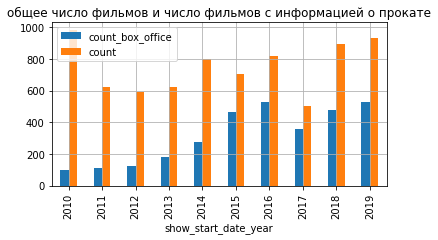

In [55]:
df_group_year.plot(kind='bar', y=['count_box_office', 'count'], title = 'общее число фильмов и число фильмов с информацией о прокате', 
                   figsize = (6,3), grid=True)


<AxesSubplot:title={'center':'доля фильмов с информацией о прокате'}, xlabel='show_start_date_year'>

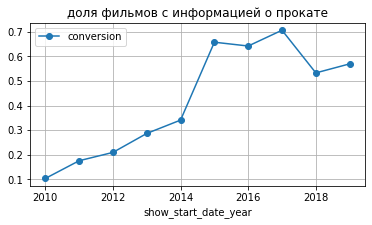

In [56]:
df_group_year.plot(y='conversion', style='o-', title = 'доля фильмов с информацией о прокате', figsize= (6,3), grid=True)

**Вывод** - Количество фильмов, выходящих в прокат, менялось каждый год, какой-то определенной тенденции нет. Самое большое количество фильмов вышло в 2010 и 2019 годах. Если рассматривать количество фильмов с информацией о прокате - то в целом наблюдается тенденция роста числа таких фильмов. Доля фильмов с информацией о прокате была максимальной в 2017 году. В период с 2015 по 2019 год наиболее полная информация о прокате фильмов относительно предыдущих периодов. 

**Изучаем, как менялась динамика проката по годам. Определяем в каком году сумма сборов была минимальной и максимальной. С помощью сводной таблицы группируем датафрем по годам и считаем сумму сборов по каждому году, а затем выводим индекс элемента с максимальным и минимальным значением.** 

In [57]:
display(df.pivot_table(index='show_start_date_year', values='box_office', aggfunc='sum'))
print('Год, в котором были максимальные сборы:', df.pivot_table(index='show_start_date_year', values='box_office', 
                                                                aggfunc='sum')['box_office'].idxmax())
print('Год, в котором были минимальные сборы:', df.pivot_table(index='show_start_date_year', values='box_office', 
                                                               aggfunc='sum')['box_office'].idxmin())

,box_office
show_start_date_year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10


Год, в котором были максимальные сборы: 2018
Год, в котором были минимальные сборы: 2010


**Вывод** Сумма сборов начиная с 2015 года значительно выросла, связано это в том числе с увеличением доли фильмов с информацией о прокате, поэтому сравнивать суммы сборов с предыдущими периодом не корректно.

**С помощью сводной таблицы считаем среднюю и медианную сумму сборов для каждого года**

In [58]:
df.pivot_table(index='show_start_date_year', values='box_office', aggfunc=['mean','median'])

,mean,median
,box_office,box_office
show_start_date_year,,
2010,2.404608e+04,1710.000
2011,1.293832e+05,3000.000
2012,5.654815e+04,6220.000
2013,1.664788e+05,3580.000
2014,2.727089e+07,20400.000
2015,8.549213e+07,5003450.150
2016,9.117390e+07,3915041.020
2017,1.360328e+08,9968340.000


**Вывод** - мы видим, что есть значительное отличие между медианным и средним значением, это обусловлено тем, что есть очень большой разброс значений, есть очень маленькие сборы и очень большие. Среднее значение более чуствительно в данном случае, чем медиана.

Посмотрим, как изменяться данные, если мы исключим малые суммы сборов (менее 100000) и большие (1000000000)

In [59]:
print(len(df.query('box_office > 100000 and box_office < 1000000000')))
df.query('box_office > 100000 and box_office < 1000000000').pivot_table(index='show_start_date_year', values='box_office', aggfunc=['mean','median'])


2297


,mean,median
,box_office,box_office
show_start_date_year,,
2010,6.201470e+05,245630.000
2011,3.251634e+06,641375.000
2012,6.051211e+05,351643.000
2013,1.766003e+06,186090.000
2014,5.446693e+07,948195.750
2015,7.231269e+07,8927658.850
2016,7.114299e+07,5789346.420
2017,9.656298e+07,9898090.000


**Вывод** - В данном случае разница между медианным и средним значением меньше. Медиана и среднене значение в период с 2010 по 2013 увеличились по сравнению с прошлым расчетом, т.к. тут было больше фильмов с маленькими сборами, а в период с 2013 пол 2019 немного уменьшилась, т.к. именно в этот период были фильмы с большими сборами.

**Определяем, влияет ли возрасное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год. Определяем фильмы с каким возрастным ограничением собрали больше всего денег в прокате.** 

Сначала определяем сумму сборов в зависимости от возрастных ограничений за весь период с 2015 по 2019 годы, группируем таблицу по возрастным ограничением с помощью свлодной таблицы и считаем сумму сборов.

In [60]:
display(df.query('show_start_date_year >= 2015').pivot_table(index='age_restriction', values='box_office', aggfunc='sum'))
print('Возрасное ограничение, в котором были максимальные сборы:', df.query('show_start_date_year >= 2015').
      pivot_table(index='age_restriction', values='box_office', aggfunc='sum')['box_office'].idxmax())
print('Возрасное ограничение, в котором были минимальные сборы:',df.query('show_start_date_year >= 2015').
      pivot_table(index='age_restriction', values='box_office', aggfunc='sum')['box_office'].idxmin())

,box_office
age_restriction,
0+,8.090774e+08
12+,6.061945e+10
16+,7.603473e+10
18+,4.075962e+10
6+,5.579861e+10


Возрасное ограничение, в котором были максимальные сборы: 16+
Возрасное ограничение, в котором были минимальные сборы: 0+


<AxesSubplot:title={'center':'сборы в зависимости от возрасной категории'}, xlabel='age_restriction'>

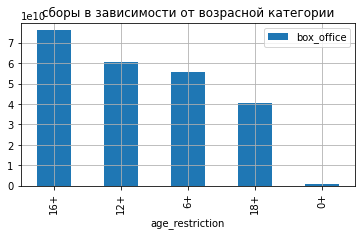

In [61]:
(df
    .query('show_start_date_year >= 2015')
    .pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
    .sort_values(by='box_office', ascending=False)
    .plot(kind='bar', title = 'сборы в зависимости от возрасной категории', figsize= (6,3), grid=True)
) 

Теперь смотрим меняется ли картина в зависимости от года, группуруем данные с помощью сводной таблицы.

In [62]:
df.query('show_start_date_year >= 2015').pivot_table(index='show_start_date_year', columns='age_restriction', 
                                                     values='box_office', aggfunc='sum')

age_restriction,0+,12+,16+,18+,6+
show_start_date_year,,,,,
2015,3.790546e+08,1.361608e+10,1.136812e+10,5.432308e+09,8.701799e+09
2016,1.502288e+08,1.220445e+10,1.666455e+10,6.793930e+09,1.205315e+10
2017,2.295989e+08,7.851428e+09,1.874504e+10,9.651496e+09,1.208614e+10
2018,3.244900e+07,1.426729e+10,1.650360e+10,8.760086e+09,1.010497e+10
2019,1.774607e+07,1.268020e+10,1.275342e+10,1.012180e+10,1.285255e+10


**Вывод** Картина меняется в зависимости от года, но не значительно. Минимальное количество сборов в возрасной категории 0+ из года в год. А вот мах значение меняется, но в большинстве случаев все-таки чаще всего больше собирают фильмы в категории 16+. Незначительные коллебания по годам скорее всего связаны с конкретными фильмами, которые выходили в соответсвующем году.

В результате исследования всех фильмов было выявлено следующее:

Количество фильмов, выходящих в прокат, менялось каждый год, какой-то определенной тенденции нет. Самое большое количество фильмов вышло в 2010 и 2019 годах. Самое маленькое количество фильмов выпущено в прокат в 2017 году.

Количество фильмов с информацией о прокате - в целом наблюдается тенденция роста числа таких фильмов. Доля фильмов с информацией о прокате была максимальной в 2017 году - около 0,7, минимальной в 2010 году - около 0,1. В период с 2015 по 2019 год наиболее полная информация о прокате фильмов относительно предыдущих периодов(с 2010 по 2014 включительно).

Сумма сборов начиная с 2015 года значительно выросла. Год, в котором были максимальные сборы: 2018, год, в котором были минимальные сборы: 2010. Однако данная информация требует дополнительного исследования, т.к. с 2015 г увеличилось количество фильмов с информаицей о сборах, ранне данной информации практически не было.

Определили, что возрасное ограничение аудитории влияет на сборы фильма в прокате в период с 2015 по 2019 год. Возрасное ограничение, в котором были максимальные сборы (70000000000 руб) : 16+, возрасное ограничение, в котором были минимальные сборы (около 800000000 руб): 0+. Картина меняется в зависимости от года, но не значительно. Минимальное количество сборов в возрасной категории 0+ из года в год. А вот мах значение меняется, но в большинстве случаев чаще всего больше собирают фильмы в категории 16+. Незначительные коллебания по годам скорее всего связаны с конкретными фильмами, которые выходили в соответсвующем году.

Посчитав среднюю и медианную сумму сборов для каждого года, видим значительное отличие между медианным и средним значением. Такое отличие обусловлено большим разбросом значений, есть очень маленькие сборы и очень большие. Среднее значение более чуствительно в данном случае, чем медиана.

**4. Исследование фильмов, которые получили государственную поддержку**

4.1. Сохраняем в переменной df_goverment данные из датафрейма df c фильмами, которым предоставлялись государственная поддрежка

In [63]:
df_goverment = df.query('not(budget.isna())').reset_index()
df_goverment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   index                  332 non-null    int64              
 1   title                  332 non-null    object             
 2   puNumber               332 non-null    int64              
 3   show_start_date        332 non-null    datetime64[ns, UTC]
 4   type                   332 non-null    object             
 5   film_studio            332 non-null    object             
 6   production_country     332 non-null    object             
 7   director               332 non-null    object             
 8   producer               330 non-null    object             
 9   age_restriction        332 non-null    object             
 10  refundable_support     332 non-null    float64            
 11  nonrefundable_support  332 non-null    float64            

Посмотрим сколько фильмов с поддержкой государства выходило в прокат в соответсвующих годах, для визуализации результатов, посторим график.

<AxesSubplot:title={'center':'количество фильмов с поддержкой государства'}, xlabel='show_start_date_year'>

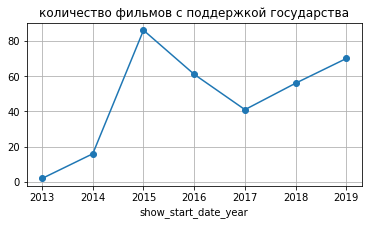

In [64]:
(df_goverment
    .groupby('show_start_date_year')['show_start_date_year'].count()
    .plot(style='o-', title = 'количество фильмов с поддержкой государства', figsize= (6,3), grid=True)
)

**Вывод** В период с 2013 по 2019 год в прокат поступило 332 фильма с государственно поддержкой. В целом в рассматриваемый период наблюдается рост числа фильмов с государственной поддержкой. Самое большое количество фильмов вышло в прока в 2015 году, в 2016-2017 наблюдался спад, а затем опять рост. Минимальное количество фильмов с гос. поддержкой было в 2013 году.

4.2 Добавим столбец с общей суммой государственной поддержки

In [65]:
df_goverment['goverment_help'] = df_goverment['nonrefundable_support'] + df_goverment['refundable_support']
df_goverment.head()

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,budget,financing_source,ratings,genres,box_office,show_start_date_year,part_goverment_help,genres_new,director_new,goverment_help
0,1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16+,...,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,0.333703,драма,А.Атанесян,26500000.0
1,1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12+,...,37142857.0,Министерство культуры,NaN,NaN,28140.0,2014,0.700000,NaN,А.Якимчук,26000000.0
2,1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12+,...,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,0.612691,комедия,Р.Давлетьяров,107847945.0
3,1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16+,...,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,0.690095,драма,Е.Миндадзе (псевдоним Катя Шагалова),28000000.0
4,1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16+,...,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,0.624764,драма,М.Угаров,25000000.0


4.3 Посчитаем сумму государственной поддержки, сумму возвратных и невозвратных средств государственной поддержки в целом и по годам. Для подсчета по годам группипуем фильмы по году с помощью сводной таблицы и считаем соответсвующие сумму государственной поддержки


In [66]:
print('Сумма, выделенная на поддержку фильмов со стороны государства:', df_goverment['goverment_help'].sum())
print('Невозвратная сумма, выделенная на поддержку фильмов со стороны государства:', 
      df_goverment['nonrefundable_support'].sum())
print('Доля невозвратной части:', (df_goverment['nonrefundable_support'].sum()/df_goverment['goverment_help'].sum()).round(decimals=2))
print('Возвратная сумма, выделенная на поддержку фильмов со стороны государства:', df_goverment['refundable_support'].sum())

Сумма, выделенная на поддержку фильмов со стороны государства: 20200688312.0
Невозвратная сумма, выделенная на поддержку фильмов со стороны государства: 16261688312.0
Доля невозвратной части: 0.81
Возвратная сумма, выделенная на поддержку фильмов со стороны государства: 3939000000.0


In [67]:
df_goverment.pivot_table(index='show_start_date_year', values=[ 'goverment_help', 'nonrefundable_support',
                                                               'refundable_support'], aggfunc='sum')

,goverment_help,nonrefundable_support,refundable_support
show_start_date_year,,,
2013,1.343479e+08,1.343479e+08,0.0
2014,5.720023e+08,5.010023e+08,71000000.0
2015,3.656241e+09,3.019088e+09,637153119.0
2016,4.303155e+09,3.381655e+09,921500000.0
2017,3.183972e+09,2.464625e+09,719346881.0
2018,3.446969e+09,2.784969e+09,662000000.0
2019,4.904000e+09,3.976000e+09,928000000.0


**Вывод** Из полученных данных видно, что государство за период с 2013 по 2019 год потратила на поддержку производства фильмов 20200688312.0 руб, при чем 16261688312.0 невозвратная сумма. Доля невозвратной части составила 0.81.
Из разбивки по годам, видно, что наименьше вложения были в 2013 и 2014 годах, а максимальное в 2019 году. В 2017 и 2018 году наблюдался небольшой спад финансирования. Аналогичная картина и по невозвратным средствамю. В 2013 году выделялись только невозвратные средства, а с 2014 года наблюдается рост возвратной части средств, со спадом в 2017 и 2018 годах.

4.4 Определим, кто финансирует государственную поддержку фильмов

In [68]:
df_goverment['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

4.5 Посмотрим на съемки каких типов фильмов государство выделяет деньги. Посмотрим меняется ли картина по годам.

In [69]:
df_goverment.groupby('type')['type'].count()

type
Анимационный       31
Документальный      1
Художественный    300
Name: type, dtype: int64

In [70]:
df_goverment.groupby('show_start_date_year')['type'].value_counts()

show_start_date_year  type          
2013                  Художественный     2
2014                  Художественный    15
                      Анимационный       1
2015                  Художественный    79
                      Анимационный       7
2016                  Художественный    56
                      Анимационный       5
2017                  Художественный    36
                      Анимационный       5
2018                  Художественный    48
                      Анимационный       8
2019                  Художественный    64
                      Анимационный       5
                      Документальный     1
Name: type, dtype: int64

**Вывод** Государство спонсирует производство художественных фильмов, значительно реже анимационных фильмов, зависимости от года нет, тенденция сохраняется.

4.6 Посмотрим на съемки фильмов, каких возврастных групп, государство выделяет деньги. Посмотрим меняется ли картина по годам.

In [71]:
df_goverment.groupby('age_restriction')['age_restriction'].count()

age_restriction
0+       8
12+    106
16+    125
18+     28
6+      65
Name: age_restriction, dtype: int64

In [72]:
df_goverment.groupby('show_start_date_year')['age_restriction'].value_counts()

show_start_date_year  age_restriction
2013                  12+                 1
                      16+                 1
2014                  16+                 6
                      12+                 5
                      0+                  2
                      18+                 2
                      6+                  1
2015                  16+                39
                      12+                24
                      6+                 17
                      18+                 5
                      0+                  1
2016                  12+                24
                      16+                21
                      6+                 11
                      18+                 3
                      0+                  2
2017                  12+                15
                      16+                11
                      6+                  9
                      18+                 4
                      0+              

**Вывод** - Больше всего госсударство принимала участие в фильмах с возрасной категорией 16+ и 12+, 125 и 106 фильмов сответственно. По годам картина в целом похожая.

4.7. Посчитаем средний рейтинг и долю государственного участия, посмотрим как данные величины менялись по годам (группируем данные по годам с помощью сводной таблицы).

In [73]:
print('Среднее значение доли государственного участия:', df_goverment['part_goverment_help'].mean())
print('Среднее значение рейтинга фильмов:', (df_goverment['ratings'].mean()))

Среднее значение доли государственного участия: 0.5420979916491464
Среднее значение рейтинга фильмов: 6.020886075949368


In [74]:
df_goverment.pivot_table(index='show_start_date_year', values=[ 'part_goverment_help', 'ratings'], aggfunc='mean')

,part_goverment_help,ratings
show_start_date_year,,
2013,0.473197,6.700000
2014,0.551318,6.006667
2015,0.561975,6.139759
2016,0.574673,5.677193
2017,0.506221,6.000000
2018,0.544880,6.001887
2019,0.507940,6.176119


Посчитаем средний рейтинг фильмов без государственной поддержки. Для этого возьмем датафрейм df, отберем фильмы без информации по бюджету и посчитаем средний рейтинг.

In [75]:
df.query('budget.isna()')['ratings'].mean()

6.510933203946306

**Вывод:** Средняя доля государственной поддрежки составляет 0,54, при этом сильных колебаний доли государственной поддержки в исследуемый период нет, она меняется в пределах 0,47 - 0,57. Средний рейтинг фильмов с государственной поддержкой составляет 6,02, по годам также нет сильных коллебаний, меняется в пределах (5,7 - 6,7). Если сравнивать средний рейтинг фильмов с государственной поддержкой и без, то тут также нет сильной разницы, рейтин фильмов без государственной поддержки только чуть выше 6,5.  

4.8. Посмотрим фильмам каких режесеров оказывали госсударственную поддержку. Определяем уникальные занчения методом unique(). Проверяем нет ли неявных дубликатов. Заменяем неявные дубликаты и методом value_counts() определяем еще раз уникальные занчения. 

In [76]:
display(df_goverment['director_new'].unique())

array(['А.Атанесян', 'А.Якимчук', 'Р.Давлетьяров',
       'Е.Миндадзе (псевдоним Катя Шагалова)', 'М.Угаров', 'С.Серегин',
       'В.Глаголева', 'А.Войтинский', 'Д.Федоров', 'Максим Свешников',
       'Т.Аленикова', 'А.Пиманов', 'А.Цицилин', 'А.Стриженов', 'А.Зайцев',
       'Р.Прыгунов', 'С.Попов', 'Д.Месхиев', 'В.Щегольков', 'А.Прошкин',
       'П.Санаев', 'С.Мокрицкий', 'А.Мельник', 'А.Аксененко', 'Ю.Кара',
       'К.Сухарьков', 'В.Демент', 'Ф.Абрютин', 'М.Бальчюнас',
       'Э.Архангельская', 'К.Шипенко', 'Д.Елеонский', 'А.Звягинцев',
       'Е.Татаров', 'А.Федорченко', 'Ю.Фетинг', 'В.Харченко', 'И.Чижиков',
       'А.Меликян', 'А.Андрианов', 'Э.Манжеева', 'А.Калинкин',
       'Е.Константинова (псевдоним Алена Званцева)', 'Н.Джорджадзе',
       'Ф.Дмитриев', 'Р.Каримов', 'Д.Штурманова', 'А.Аравин',
       'С.Говорухин', 'К.Ангелина', 'А.Карпиловский', 'Стефано Лоренци',
       'В.Хотиненко', 'В.Штерянов при участии Е.Немых', 'С.Комаров',
       'И.Северов', 'А.Ананикян', 'К.Белевич

In [77]:
dictionary5 = {' Ф.Бондарчук': 'Ф.Бондарчук', 'А.Михалков': 'А.Кончаловский', 'А.Михалков (псевдоним А.Кончаловский)': 'А.Кончаловский', 
               'А.Черномазов (псевдоним Алексей Нужный)': 'А.Нужный', 'К.Белевич (псевдоним - Кирилл Астахов)': 'К.Белевич', 
               'М.Бальчюнас (псевдоним М.Вайсберг)': 'М.Бальчюнас', 'М.Бальчюнас (псевдоним Марюс Вайсберг)': 'М.Бальчюнас',
               'В.Штерянов при участии Е.Немых': 'В.Штерянов', 'Н.Степанова при участии С.Иванова': 'Н.Степанова', 
               'Ф.Коршунов при участии П.Мирзоева': 'Ф.Коршунов при участии П.Мирзоева'}

df_goverment['director_new'] = df_goverment['director_new'].replace(dictionary5)
df_goverment['director_new'].value_counts()

Р.Давлетьяров    5
С.Андреасян      4
Д.Дьяченко       4
С.Мокрицкий      3
М.Бальчюнас      3
                ..
М.Кравченко      1
А.Мегердичев     1
Т.Аленикова      1
С.Проскурина     1
А.Кравчук        1
Name: director_new, Length: 264, dtype: int64

**Вывод** - Чаще всего за рассматриваемый период государство поддерживало фильмы режесеров - Р.Давлетьярова (5 фильмов), Д.Дьяченко и С.Андреасяна (4 фильма).

4.9. Посмотри окупаются ли фильмы с государственным участием. Для этого в датафрейме df_goverment добавим столбец 'income', в него дабавим разницу между сборами от фильма и его бюджетом. Затем посчитаем долю фильмов, у которых доход >0 (при этом в расчете не учитываем фильмы сборы по которым не известны: для этого в новый датафрейм df_goverment_new сохраняем данные без пропусков в столбце income).

In [78]:
df_goverment['income'] = df_goverment['box_office'] - df_goverment['budget']
df_goverment.head()

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,financing_source,ratings,genres,box_office,show_start_date_year,part_goverment_help,genres_new,director_new,goverment_help,income
0,1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16+,...,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,0.333703,драма,А.Атанесян,26500000.0,-79046546.4
1,1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12+,...,Министерство культуры,NaN,NaN,28140.0,2014,0.700000,NaN,А.Якимчук,26000000.0,-37114717.0
2,1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12+,...,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,0.612691,комедия,Р.Давлетьяров,107847945.0,-156066458.5
3,1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16+,...,Министерство культуры,4.2,драма,55917.5,2014,0.690095,драма,Е.Миндадзе (псевдоним Катя Шагалова),28000000.0,-40518222.5
4,1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16+,...,Министерство культуры,6.4,драма,232100.0,2014,0.624764,драма,М.Угаров,25000000.0,-39783022.0


In [79]:
df_goverment_new = df_goverment.query('not(income.isna())')
df_goverment_new['income'].isna().sum()

0

In [80]:
len(df_goverment_new.query('income > 0'))/len(df_goverment_new)

0.24842767295597484

**Вывод** - только около 25 % фильмов с государственной поддержкой окупаются.

4.10. Посмотрим есть ли зависимость между количественными столбцами датафрейма df_goverment и какие. Строим матрику корреляции для интересующих нас столбцов и диаграммы рассеяния.


In [81]:
df_goverment[['ratings', 'box_office', 'budget', 'part_goverment_help', 'goverment_help', 'income']].corr()


,ratings,box_office,budget,part_goverment_help,goverment_help,income
ratings,1.000000,0.143755,0.088855,-0.070519,0.102222,0.091610
box_office,0.143755,1.000000,0.375631,-0.084591,0.488976,0.839991
budget,0.088855,0.375631,1.000000,-0.283001,0.736250,-0.187338
part_goverment_help,-0.070519,-0.084591,-0.283001,1.000000,0.110352,0.085326
goverment_help,0.102222,0.488976,0.736250,0.110352,1.000000,0.099607
income,0.091610,0.839991,-0.187338,0.085326,0.099607,1.000000


<AxesSubplot:title={'center':'Зависимость между рейтингом и долей государственного участия'}, xlabel='part_goverment_help', ylabel='ratings'>

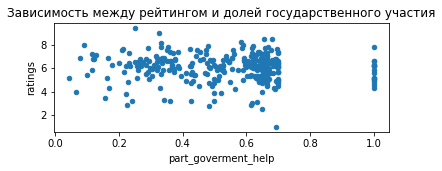

In [82]:
df_goverment.plot(x='part_goverment_help', y='ratings', 
                  title='Зависимость между рейтингом и долей государственного участия', kind='scatter', figsize= (6,2))

**Вывод** - зависимости между рейтингом и долей государственного участия нет или она более сложная.

<AxesSubplot:title={'center':'Зависимость между рейтингом и бюджетом фильма'}, xlabel='budget', ylabel='ratings'>

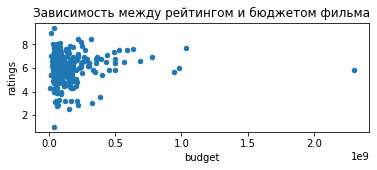

In [83]:
df_goverment.plot(x='budget', y='ratings', 
                  title='Зависимость между рейтингом и бюджетом фильма', kind='scatter', figsize= (6,2))

<AxesSubplot:title={'center':'Зависимость между рейтингом и окупаемостью фильмов'}, xlabel='income', ylabel='ratings'>

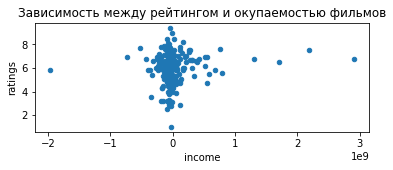

In [84]:
df_goverment.plot(x='income', y='ratings', 
                  title='Зависимость между рейтингом и окупаемостью фильмов', kind='scatter', figsize= (6,2))

**Вывод** - зависимости между рейтингом и окупаемостью фильма нет или она более сложная.

<AxesSubplot:title={'center':'Зависимость между суммой государственной поддержки и бюджетом фильмов'}, xlabel='budget', ylabel='goverment_help'>

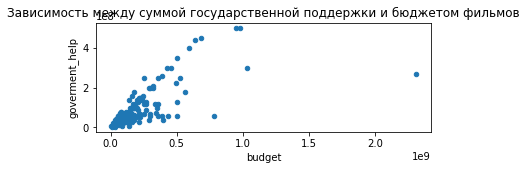

In [85]:
df_goverment.plot(x='budget', y='goverment_help', 
                 title='Зависимость между суммой государственной поддержки и бюджетом фильмов', kind='scatter', figsize= (6,2))

**Вывод** - зависимости между размером государственной поддержки и бюджетом фильма прослеживается, чем больше бюджет фильма, тем как правило выше сумма государственно поддержки.

Смотрю, какие уникальные значения есть в столбце production_country датафрейма фильмов с государственной поддержкой df_goverment, чтобы понять с какой выборкой из обшего датафрема фильмов df сравнивать. 

In [86]:
df_goverment['production_country'].unique()

array(['Россия', 'Россия, Франция, Латвия', 'Россия-Украина',
       'Россия, Италия', 'Россия, Украина, Польша',
       'Россия, Германия, Великобритания', 'Россия, Германия',
       'Россия, Армения', 'Россия-Словакия-Чехия',
       'Россия, Латвия, Чешская Республика',
       'Россия, Германия, Казахстан, Польша, Китай', 'Россия, Сербия',
       'Россия - Грузия', 'Россия-Китай', 'Россия, Бельгия, Финляндия'],
      dtype=object)

Видим, что есть фильмы, где указана только Россия и есть фильмы совместного производтсва России с другими странами. Соответсвенно в общем датафрейме df находим аналогичные фильмы только без государственной поддержки и сохраним их в новом датафрейме df_russia. Для этого в датафрейме df добавляем столбец production_country_new, в котором заменяем значение на Россию, если среди стран производивших фильм, упоминается Россия, остальные значения оставляем как есть. Проверяем. Затем в датафрейме 
df_russia оставляем только фильмы, у которых в столбце production_country_new указано Россия и нет значений в столбце budget (это фильмы без гос. поддержки). Проверяем.

In [87]:
def change_production_country(row):
    if 'Россия' in row:
        return 'Россия'
    
    else:
        return row
    
df['production_country_new'] = df['production_country'].apply(change_production_country) 
print(df['production_country_new'].unique())  

['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Франция - Испания' 'США-Германия'
 'США - Великобритания' 'Великобритания' 'США - Германия'
 'Франция - Мексика - США' 'Россия' 'СССР, Швеция' 'Германия'
 'Великобритания-США-Германия-КНР' 'СССР, ЧССР, Западный Берлин, ПНР'
 'СССР, Италия' 'Гонконг, КНР' 'США - Франция'
 'США - Япония - Франция - Великобритания'
 'Гонконг - Сингапур - Таиланд - Великобритания' 'США-Канада'
 'Франция - Италия - Великобритания - США' 'Франция - США'
 'Ирландия-Великобритания-Германия' 'Чехия' 'США-Австралия'
 'СССР, Финляндия' 'США-Франция-Великобритания-Австрия' 'США - Бельгия'
 'США - Ирландия - Великобритания' 'Великобритания - США'
 'Люксембург - Нидерланды - Испания - Великобритания - США - Италия'
 'Великобритания - Франция - США' 'Новая Зеландия - США'
 'США - Великобритания - Чехия' 'Канада - Франция - Великобритания'
 'Ирландия' 'Великоб

In [88]:
df_russia = df.query('production_country_new == "Россия" and budget.isna()')
df_russia

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_date_year,part_goverment_help,genres_new,director_new,production_country_new
61,Американская дочь,111005515,2015-04-23 12:00:00+00:00,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"",...","Россия, Казахстан, США",К.Шахназаров,NaN,6+,NaN,...,NaN,NaN,7.0,"драма,комедия",300.0,2015,NaN,драма,К.Шахназаров,Россия
311,Фара,211040615,2015-09-10 12:00:00+00:00,Художественный,"ЗАО Студия ""Эй-Би-Эй"", Национальный продюсерск...",Россия - Казахстан,А.Карпыков,Б.Айрапетян,12+,NaN,...,NaN,NaN,7.6,"триллер,драма",NaN,2015,NaN,триллер,А.Карпыков,Россия
336,Каникулы строгого режима,111008514,2014-08-07 12:00:00+00:00,Художественный,"ООО ""Кинобазза"" по заказу ЗАО ""Дирекция Кино""",Россия,И.Зайцев,"А.Максимов, Н.Попов, Д.Файзиев",12+,NaN,...,NaN,NaN,7.1,"драма,комедия,приключения",360.0,2014,NaN,драма,И.Зайцев,Россия
462,Август. Восьмого,111000612,2012-02-07 12:00:00+00:00,Художественный,"ЗАО ""ПК ""ГЛАВКИНО""",Россия,Д.Файзиев,"Д.Файзиев, Ф.Бондарчук, И.Бачурин",12+,NaN,...,NaN,NaN,6.1,"драма,военный",6775.0,2012,NaN,драма,Д.Файзиев,Россия
463,Тот еще...!,111001612,2012-02-20 12:00:00+00:00,Художественный,"ООО ""Энджой мувиз""",Россия,С.Андреасян,Г.Малков,12+,NaN,...,NaN,NaN,2.6,"фэнтези,комедия,семейный",12779.0,2012,NaN,фэнтези,С.Андреасян,Россия
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7470,Дикие и свободные,112004819,2019-12-23 12:00:00+00:00,Документальный,"АНО ""ТВ-Новости""",Россия,Н.Карачкова,В.Сенина,6+,NaN,...,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN,Н.Карачкова,Россия
7475,Папа,111022919,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",Россия,К.Чувикова,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",18+,NaN,...,NaN,NaN,8.2,драма,NaN,2019,NaN,драма,К.Чувикова,Россия
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,18+,NaN,...,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN,Д.Григорьев,Россия
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,0+,NaN,...,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN,А.Беляев,Россия


In [89]:
len(df_russia.query('not (box_office.isna())'))

531

Теперь считаем средний рейтинг фильмов, произведенных с участием Росии, но без государственной поддержки и сумму сборов по ним, а также среднюю сумму сборов.

In [90]:
print('Среднее значение рейтинга фильмов, произведенных с участием России без гос. поддержки:', 
      df_russia['ratings'].mean())
print('Сборы фильмов, произведенных с участием России без гос. поддержки:', df_russia['box_office'].sum())
print('Среднее значение сборов:', df_russia['box_office'].mean())

Среднее значение рейтинга фильмов, произведенных с участием России без гос. поддержки: 6.200091575091575
Сборы фильмов, произведенных с участием России без гос. поддержки: 10564178389.349998
Среднее значение сборов: 19894874.556214686


Считаем сумму сборов фильмов с государственной поддержкой и среднюю сумму сборов, а средний рейтинг уже посчитали ранее - 6.02.

In [91]:
print('Сборы фильмов с государственной поддержкой:', df_goverment['box_office'].sum())
print('Среднее значение сборов:', df_goverment['box_office'].mean())

Сборы фильмов с государственной поддержкой: 42113509574.78
Среднее значение сборов: 132432420.04647799


**Вывод по варианту сравнения фильмов с гос. поддержкой только с фильмами, в производстве которых принимала участие Россия, без поддержки государства** 
Средний рейтинги фильмов с гос. поддеркой и фильмов с участием России без гос. поддержки похожи (6,02 и 6,2 соответсвенно). Если сравнивать средние значения сборов, тут лидируют фильмы с гос. поддержкой.

**Итоговый вывод**
Было проведено исследование рынка российского кинопроката. Нужно было изучить рынок российского кинопроката и выявить текущие тренды. Исследовать фильмы, которые получили государственную поддержку, понять какой рейтинг данных фильмов, хорошо ли они окупаются. Работа проводилась с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержал информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
Во время исследлвания. 

**В результате исследования всех фильмов было выявлено следующее:**

1. Количество фильмов, выходящих в прокат, менялось каждый год, какой-то определенной тенденции нет. Самое большое количество фильмов вышло в 2010 и 2019 годах. Самое маленькое количество фильмов выпущено в прокат в 2017 году.

2. Количество фильмов с информацией о прокате - в целом наблюдается тенденция роста числа таких фильмов. Доля фильмов с информацией о прокате была максимальной в 2017 году - около 0,7, минимальной в 2010 году - около 0,1. В период с 2015 по 2019 год наиболее полная информация о прокате фильмов относительно предыдущих периодов(с 2010 по 2014 включительно).

3. Сумма сборов начиная с 2015 года значительно выросла. Год, в котором были максимальные сборы: 2018, год, в котором были минимальные сборы: 2010. Однако данная информация требует дополнительного исследования, т.к. с 2015 г увеличилось количество фильмов с информаицей о сборах, ранне данной информации практически не было.

4. Определили, что возрасное ограничение аудитории влияет на сборы фильма в прокате в период с 2015 по 2019 год. Возрасное ограничение, в котором были максимальные сборы (70000000000 руб) : 16+, возрасное ограничение, в котором были минимальные сборы (около 800000000 руб): 0+. Картина меняется в зависимости от года, но не значительно. Минимальное количество сборов в возрасной категории 0+ из года в год. А вот мах значение меняется, но в большинстве случаев чаще всего больше собирают фильмы в категории 16+. Незначительные коллебания по годам скорее всего связаны с конкретными фильмами, которые выходили в соответсвующем году.

**В результате исследования всех фильмов с государственной поддержкой было выявлено следующее:**

1. В период с 2013 по 2019 год в прокат поступило 332 фильма с государственно поддержкой. В целом в рассматриваемый период наблюдается рост числа фильмов с государственной поддержкой. Самое большое количество фильмов вышло в прока в 2015 году - 86, в 2016-2017 наблюдался спад, а затем опять рост. Минимальное количество фильмов с гос. поддержкой было в 2013 году - 2.

2. В целом на поддержку фильмов государство выделило:
- сумма, выделенная на поддержку фильмов со стороны государства: 20200688312 руб
- невозвратная сумма, выделенная на поддержку фильмов со стороны государства: 16261688312 руб, доля невозвратной части: 0.81
- возвратная сумма, выделенная на поддержку фильмов со стороны государства: 3939000000 руб
Из разбивки по годам, видно, что наименьше вложения были в 2013 и 2014 годах, а максимальное в 2019 году. В 2017 и 2018 году наблюдался небольшой спад финансирования. Аналогичная картина и по невозвратным средствам. В 2013 году выделялись только невозвратные средства, а с 2014 года наблюдается рост возвратной части средств, со спадом в 2017 и 2018 годах.

3. Источник финансирования фильмов - Министерство культуры и Фонд кино.
   Министерство культуры               164 фильма
   Фонд кино                           146 фильма
   Министерство культуры, Фонд кино     22 фильма
   
4. Больше всего с государственной поддрежкой снимается художественных фильмов (300), меньше анимационных (31), и один документальный фильм. 

5. Больше всего госсударство принимала участие в фильмах с возрасной категорией 16+ и 12+, 125 и 106 фильмов сответственно.

6. Средняя доля государственной поддрежки составляет 0,54, при этом сильных колебаний доли государственной поддержки в исследуемый период нет, она меняется в пределах 0,47 - 0,57. 

7. Средний рейтинг фильмов с государственной поддержкой составляет 6,02, по годам также нет сильных коллебаний, меняется в пределах (5,7 - 6,7). Если сравнивать средний рейтинг фильмов с государственной поддержкой и без, то тут также нет сильной разницы, рейтин фильмов без государственной поддержки только чуть выше 6,5.  

8. Чаще всего за рассматриваемый период государство поддерживало фильмы режесеров - Р.Давлетьярова (5 фильмов), Д.Дьяченко и С.Андреасяна (4 фильма)

9. Только около 25 % фильмов с государственной поддержкой окупаются.

10. Также было рассмотрено, есть ли зависимость между следующими величинами:
- зависимость между рейтингом и долей государственного участия - ее нет или она более сложная;
- зависимости между рейтингом и бюджетом  - ее нет или она более сложная;
- зависимости между рейтингом и окупаемостью фильма - ее нет или она более сложная;
- зависимости между размером государственной поддержки и бюджетом фильма -  прослеживается, чем больше бюджет фильма, тем как правило выше сумма государственно поддержки.

  
